# SVR

## Einleitung

Quelle:https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff

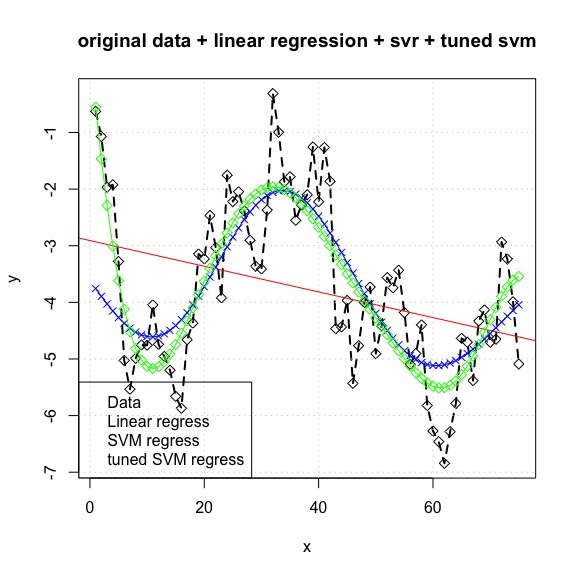

In [30]:
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy.stats import kurtosis
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

pd.options.display.precision = 10

## Umgebungsvariablen

In [2]:
#feature generated 24.03.2019
earthquake_daten = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/'''
feature_62900_94 = 'Features_62900-94.csv'
feature_41934_94 = 'Features_41934_94.csv'
Features_4194_94 = 'Features_4194_94.csv'

# Feature laden

In [3]:
train_data = pd.read_csv(earthquake_daten+feature_62900_94)
train_data = shuffle(train_data, random_state=10)

In [4]:
feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

## Feature Filtern

In [22]:
items_to_filter = ['']

In [23]:
filtered_feature_data = feature_data.filter(items=items_to_filter)

In [24]:
feature_data = filtered_feature_data

## Training / Testdaten vorbereiten

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_data,
    time_to_failure,
    random_state=0,
    test_size=0.25)

# Model Workbench

## Imports

In [21]:
# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
# Modell
from sklearn.svm import SVR

from joblib import dump, load


In [12]:
def modelfit(alg, dtrain, time_to_failure, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, time_to_failure)
      
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)

    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain, time_to_failure, cv=cv_folds, scoring='neg_mean_absolute_error',n_jobs=-1)
    
    #Print model report:
    print("\nModel Report")
    print("MAE train data: %.4g" % mean_absolute_error(time_to_failure, dtrain_predictions))
    
    if performCV:
        print("CV Score MAE: \nMean %.7g \nStd %.7g \nMin %.7g \nMax %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances',figsize=(15,10))
        plt.ylabel('Feature Importance Score')

# Baseline

## Scale

In [7]:
min_max_scaler = MinMaxScaler()
feature_data_minMax = min_max_scaler.fit_transform(feature_data)

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
standard_scaler = StandardScaler()
feature_data_standard = standard_scaler.fit_transform(feature_data)

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Fit SVR linear

### MinMax Scaler

In [9]:
gbm0 = SVR(kernel='linear')
modelfit(gbm0, feature_data_minMax, time_to_failure,printFeatureImportance=False)


Model Report
MAE train data: 2.061
CV Score MAE: 
Mean -2.066005 
Std 0.01625295 
Min -2.086994 
Max -2.044022


### Standard Scaler

In [30]:
gbm0 = SVR(kernel='linear')
modelfit(gbm0, feature_data_standard, time_to_failure,printFeatureImportance=False)


Model Report
MAE : 2.048
CV Score : Mean - -2.156031 | Std - 0.4135659 | Min - -2.455205 | Max - -1.34103


## Fit SVR rbf

### MinMax Scaler

In [10]:
gbm1 = SVR(kernel='rbf')
modelfit(gbm1, feature_data_minMax, time_to_failure,printFeatureImportance=False)

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Model Report
MAE train data: 2.099
CV Score MAE: 
Mean -2.106559 
Std 0.01497552 
Min -2.12685 
Max -2.089522


### Standard Scaler

In [13]:
gbm1 = SVR(kernel='rbf')
modelfit(gbm1, feature_data_standard, time_to_failure,printFeatureImportance=False)

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Model Report
MAE train data: 1.869
CV Score MAE: 
Mean -2.184047 
Std 0.4358766 
Min -2.577163 
Max -1.348986


# Parameter Tuning 94 Feature

In [9]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', SVR())])

Parameter festlegen

In [9]:
param_grid = [
    {'regressor': [SVR(kernel='rbf',epsilon=.1)], 
     'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'regressor': [SVR(kernel='linear')],
     'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [10]:
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=5,n_jobs=-1)
grid.fit(feature_data, time_to_failure)


print('SVR')
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(feature_data, time_to_failure)))
print("Test-set: mean absolute error : {:.2f}".format(mean_absolute_error(time_to_failure, grid.predict(feature_data))))

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


SVR
Best params:
{'regressor': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), 'regressor__C': 100, 'regressor__gamma': 10}

Best cross-validation score: -1.21
Test-set score: -0.11
Test-set: mean absolute error : 0.11


### Best Parameter:
  - MinMaxScaler
  - Kernel = 
  - c = 100
  - gamma = 10
  
  
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Train Model

In [18]:
param_grid = [
    {'regressor': [SVR(kernel='rbf',epsilon=.1)], 
     'regressor__gamma': [10],
     'regressor__C': [100]}]

In [27]:
svr_model = SVR(C=100, cache_size=500, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
minmax_scaler = MinMaxScaler().fit(X_test)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled =  minmax_scaler.transform(X_test)
dump(y_test,earthquake_daten+'model/svr/y_test.joblib')
dump(minmax_scaler, earthquake_daten+'model/svr/minMax_Scaler.joblib') 
dump(X_test_scaled,earthquake_daten+'model/svr/X_test_scaled_svr_95.joblib')
dump(X_train_scaled,earthquake_daten+'model/svr/X_train_scaled_svr_95.joblib')

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


['C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/model/svr/X_train_scaled_svr_95.joblib']

In [19]:
svr_model.fit(X_train_scaled,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Save trained SVR-Model

In [26]:
dump(svr_model,earthquake_daten+'model/svr/srv_rfb_62900_94-train-test-split_model.joblib') 

['srv_rfb_62900_94-train-test-split_model.joblib']

In [25]:
x_test_scaled = minmax_scaler.transform(X_test)
print("Test-set: mean absolute error : {:.2f}".format(mean_absolute_error(y_test, svr_model.predict(x_test_scaled))))

Test-set: mean absolute error : 0.93


## Test with 95 Feature trained model

In [29]:
minmax_scaler =  load(earthquake_daten+'model/svr/minMax_Scaler.joblib') 
svr_test_model = load(earthquake_daten+'model/svr/srv_rfb_62900_94-train-test-split_model.joblib')

In [31]:
X_test_scaled = load(earthquake_daten+'model/svr/X_test_scaled_svr_95.joblib')
y_test = load(earthquake_daten+'model/svr/y_test.joblib')

In [33]:
svr_model = load(earthquake_daten+'model/svr/srv_rfb_62900_94-train-test-split_model.joblib')

In [34]:
print("Test-set: mean absolute error : {:.2f}".format(mean_absolute_error(y_test, svr_model.predict(X_test_scaled))))

Test-set: mean absolute error : 0.93


# Parameter Tuning (c,gamma) SVR 20 Feature



## Feature laden und filtern

In [5]:
train_data = pd.read_csv(earthquake_daten+Features_4194_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

items_to_filter = ['spec_cent_75%q', 'mean', 'rolloff_75%q', 'zero_crossings', 'spec_cent_95%q', 'skew', 'min', 'absMax', 'spec_bw_75%q', 'spec_cent_mean', 'max', 'spec_bw_25%q', 'spec_cent_std', 'psd_kurt', 'rolloff_25%q', 'spec_cent_absMean', 'psd_skew', 'spec_cent_min', 'spec_cent_absStd', 'rolloff_95%q']
filtered_feature_data = feature_data.filter(items=items_to_filter)

## Hyperparameter Tuning

In [32]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('regressor', SVR(kernel='rbf',epsilon=.1))])

In [33]:
param_grid = [
    {
     'preprocessing': [StandardScaler(),MinMaxScaler()],
     'regressor__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'regressor__C': [0.001, 0.01, 0.1, 1, 10, 100]
    }]

In [34]:
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=5,n_jobs=-1)
grid.fit(feature_data, time_to_failure)


print('SVR Kernel rbf 20F')
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(feature_data, time_to_failure)))
print("Test-set: mean absolute error : {:.2f}".format(mean_absolute_error(time_to_failure, grid.predict(feature_data))))

SVR Kernel rbf 20F
Best params:
{'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1)), 'regressor__C': 10, 'regressor__gamma': 0.1}

Best cross-validation score: -2.05
Test-set score: -1.99
Test-set: mean absolute error : 1.99


In [49]:
param_grid = [
    {
     'preprocessing': [MinMaxScaler()],
     'regressor__gamma': [0.3],
     'regressor__C': [4],
     'regressor__epsilon': [0.1,0.2,0.3]
    }]

In [50]:
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=5,n_jobs=-1)
grid.fit(feature_data, time_to_failure)


print('SVR Kernel rbf 20F')
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(feature_data, time_to_failure)))
print("Test-set: mean absolute error : {:.2f}".format(mean_absolute_error(time_to_failure, grid.predict(feature_data))))

SVR Kernel rbf 20F
Best params:
{'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1)), 'regressor__C': 4, 'regressor__epsilon': 0.2, 'regressor__gamma': 0.3}

Best cross-validation score: -2.04
Test-set score: -1.95
Test-set: mean absolute error : 1.95


## Validate (crossvalidation) tuned Model

In [51]:
pipe_cross_val = make_pipeline(preprocessing.MinMaxScaler(), SVR(C=4, 
                                                      epsilon=0.2, 
                                                      gamma=0.3, 
                                                      kernel='rbf', 
                                                      verbose=False))

In [52]:
cv_score = cross_val_score(pipe_cross_val, filtered_feature_data, time_to_failure,scoring='neg_mean_absolute_error', cv=5)
print("CV Score MAE: \nMean %.7g \nStd %.7g \nMin %.7g \nMax %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score MAE: 
Mean -2.037749 
Std 0.06253334 
Min -2.123404 
Max -1.959227


## Validate (crossvalidation) tuned Model with 49000 rows

In [56]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
train_data = shuffle(train_data, random_state=10)

feature_data = train_data.iloc[:,1:95]
time_to_failure_validation = np.array(train_data.iloc[:,-1])

items_to_filter = ['spec_cent_75%q', 'mean', 'rolloff_75%q', 'zero_crossings', 'spec_cent_95%q', 'skew', 'min', 'absMax', 'spec_bw_75%q', 'spec_cent_mean', 'max', 'spec_bw_25%q', 'spec_cent_std', 'psd_kurt', 'rolloff_25%q', 'spec_cent_absMean', 'psd_skew', 'spec_cent_min', 'spec_cent_absStd', 'rolloff_95%q']
filtered_feature_data_validation = feature_data.filter(items=items_to_filter)

In [57]:
pipe_cross_val = make_pipeline(preprocessing.MinMaxScaler(), SVR(C=4, 
                                                      epsilon=0.2, 
                                                      gamma=0.3, 
                                                      kernel='rbf', 
                                                      verbose=False))

In [58]:
cv_score = cross_val_score(pipe_cross_val, filtered_feature_data_validation, time_to_failure_validation,scoring='neg_mean_absolute_error', cv=5)
print("CV Score MAE: \nMean %.7g \nStd %.7g \nMin %.7g \nMax %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score MAE: 
Mean -2.009762 
Std 0.01248937 
Min -2.027823 
Max -1.99842


# Submission
## Load model and scaler

In [10]:
minmax_scaler =  load(earthquake_daten+'model/svr/minMax_Scaler.joblib') 
svr_test_model = load(earthquake_daten+'model/svr/srv_rfb_62900_94-train-test-split_model.joblib') 

In [11]:
#Test_Features_20 ='''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/Test_Features_20.csv'''
Kaggle_Test_Features_95 ='''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/Kaggle_Test_Features_94.csv'''
svr_model_competition = 'srv_rfb_62900_94-train-test-split_model.joblib'
test_data_path = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/'''

In [12]:
test_data_kaggle = pd.read_csv(Kaggle_Test_Features_95)

Preprocess Kaggle test data

In [35]:
submission = pd.DataFrame()
submission['time_to_failure'] = svr_test_model.predict(minmax_scaler.transform(test_data_kaggle.iloc[:,1:95]))
submission['seg_id'] = test_data_kaggle.ix[:,'seg_id']
submission = submission[['seg_id', 'time_to_failure']]
submission.to_csv(earthquake_daten+'model/svr/submission_srv_rfb_62900_94-train-test-split_model.csv',index=False)

C:\Users\chianti\.conda\envs\TensorFlow-GPU-Keras\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
submission[submission.time_to_failure < 0]

,seg_id,time_to_failure
10,seg_006e4a,-1.1192199357
559,seg_37669c,-0.4338709315
1069,seg_6e12ee,-0.4534561342
1714,seg_ab001b,-0.2491329234
2097,seg_ceab44,-0.9451461144
2349,seg_e5b510,-0.7764087099
